# 3.1 线性回归

在机器学习领域中，大多数任务通常都与预测（prediction）有关。若预测值为连续值（如股票价格），称为“回归问题”，若为离散值（如骰子点数），称为“分类问题”。

## 3.1.1 线性回归的基本元素

线性回归（linear regression）是一种最简单且最流行的回归方法。它基于几个简单的假设：首先，自变量x与因变量y之间呈线性关系，即y可以表示为x中元素的加权和，且通常允许包含观测值的一些噪声。其次，任何噪声都遵循正态分布。

举个例子，假设我们希望根据房屋的面积（平方米）和房龄（年）来估算房屋价格（元），会先收集一个真实的数据集，称为训练集（training dataset），这个
数据集中有很多个样本（sample/data point/instance），每个样本都含有房屋的面积、房龄（称为特征，feature）和房屋价格（称为标签，label）。

通常，我们使用$ n $来表示数据集中的样本数。在本例中，索引为$ i $的样本，其输入表示为$ \boldsymbol{x}^{(i)} = [x_1^{(i)}, x_2^{(i)}]^T $，对应的标签为$ y^{(i)} $。

### 1. 线性模型

在上面的例子中，如果做出线性假设，则有

$$ price = w_{area} \cdot area + w_{age} \cdot age + b $$

式中，$ w_{area} $和$ w_{age} $称为权重（weight），$ b $称为偏置/截距（bias/intercept）。

给定一个数据集，我们的目标是寻找模型的$ \boldsymbol{w} $和$ b $，使模型做出的预测能很好地估计真实价格。

在机器学习中，我们通常使用高维的数据集。假设我们的输入包含$ d $个特征，则预测结果$ \hat{y} $可表示为：

$$ \hat{y} = \boldsymbol{w} ^Tx + b $$

假设用$ \boldsymbol{X} $表示整个数据集，即每行代表了一个样本的各个特征值，则：

$$ \hat{\boldsymbol{y}} = \boldsymbol{X} \boldsymbol{w} + b $$

但是，我们几乎不能完美预测，即令所有的样本$ i $，都满足$ y^{(i)} = \boldsymbol{w}^Tx^{(i)} + b $。因此，在寻找最佳的模型参数$ \boldsymbol{w} $和$ b $时，我们还需要两个工具：

（1）一种衡量模型好坏的标准；

（2）一种能更新模型，使模型变得更好的方法。

### 2. 损失函数

损失函数（loss function）能量化目标的实际值与预测值之间的误差。通常，选择非负数作为损失，且数值越小，表示的损失越小，完美预测时的损失为0。

在回归问题中，最常用的损失函数是平方误差函数。当样本$ i $的预测值为$ \hat{y^{(i)}} $，真实标签为$ y^{(i)} $时，样本$ i $的平方误差可定义为：

$$ l^{(i)}(\boldsymbol{w},b) = \frac{1}{2}(\hat{y^{(i)}} - y^{(i)})^2 $$

为度量模型在整个数据集上的预测效果，将损失函数定义为全部的$ n $个样本的损失均值，称为均方误差（mean square error，mse）：

$$ L(\boldsymbol{w},b) = \frac{1}{n} \sum_{i = 1}^n l^{(i)}(\boldsymbol{w},b) = \frac{1}{n} \sum_{i = 1}^n \frac{1}{2}(\boldsymbol{w}^T\boldsymbol{x}^{(i)} + b - y^{(i)})^2 $$

在训练模型时，我们的目的是寻找一组能最小化损失函数的参数$ (\boldsymbol{w}^*, b^*) $：
$$ \boldsymbol{w}^*, b^* = \underset{\boldsymbol{w},b}{\arg \min L(\boldsymbol{w},b)} $$

### 3. 解析解

线性回归是简单的优化问题，它的结果是一个表达式：

$$ \boldsymbol{w}^* = (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{y} $$

式中，在$ \boldsymbol{X} $中添加了值为1的特征，并使参数$ b $合并到了$ \boldsymbol{w} $中。像这类，能用“公式”表示的解称为解析解（analytical solution）。

解析解可以进行很好的数学分析，然而，在大多数更复杂的问题中，我们无法得到这样的解析解，使得其无法广泛应用在深度学习中。但是，我们仍能得到模型在特定输入下的数值输出，称为数值解。

### 4. 随机梯度下降

在深度学习中，即使无法得到解析解，也可以对模型进行优化，这里介绍梯度下降（gradient descent）。

梯度下降的基本思想就是计算损失函数（所有样本的平均损失）关于模型参数的（偏）导数，这些导数组成的张量称为梯度，其方向是损失函数增加最快的方向，通过不断在负梯度方向更新参数，就可以使得损失不断减小。

但是，如果每次都计算所有样本的平均损失，计算开销是很大的。因此，我们通常在需要更新参数时，随机抽取一小批样本计算梯度，称为小批量随机梯度下降（minibatch stochastic gradient descent）。

下面用数学公式表示这一更新过程：

$$ (\boldsymbol{w}, b) \leftarrow (\boldsymbol{w}, b) - \frac{\eta}{| B |}\underset{i \in B} \sum{\partial_{(\boldsymbol{w}, b)} l^{(i)} (\boldsymbol{w}, b)} $$

即

$$ \boldsymbol{w} \leftarrow \boldsymbol{w} - \frac{\eta}{| B |}\underset{i \in B} \sum{\boldsymbol{x^{(i)}}(\boldsymbol{w}^T\boldsymbol{x}^{(i)} + b - y^{(i)})} $$

$$ b \leftarrow b - \frac{\eta}{| B |}\underset{i \in B} \sum{(\boldsymbol{w}^T\boldsymbol{x}^{(i)} + b - y^{(i)})} $$

其中，$ \boldsymbol{w} $和$ \boldsymbol{x}^{(i)} $均为向量，$ | B | $为小批量中样本的个数，也称批量大小（batch size）。$ \eta $表示学习率（learning rate）。不同于训练过程中不断更新的参数，批量大小和学习率都是预先手动设置的参数，称为超参数（hyperparameter）。调参（hyperparameter tuning）是选择超参数的过程。

超参数通常是我们根据训练迭代结果来调整的，而这个结果是根据模型在独立的验证数据集（validation dataset）上的表现来评估的。

训练了若干代后，我们可以得到模型参数的估计值$ (\hat{\boldsymbol{w}}, \hat{b}) $，但即使我们的函数确实是线性且无噪声的，这些估计值也不会使损失函数真正地达到最小值，因为算法会只使损失向最小值缓慢收敛，无法在有限次的迭代中非常精确地达到最小值。

事实上，对复杂模型来说，损失（超）平面通常包含多个最小值，而深度学习实践者也很少去寻找在训练集上能达到最小损失的参数。更难的，是找到一组能在从未见过的数据上实现较小损失的参数，这一挑战称为泛化（generalization）。

### 5. 用模型进行预测

给定“已训练”的线性回归模型$ \hat{\boldsymbol{w}}^Tx + \hat{b} $，我们可以通过房屋面积$ x_1 $和房龄$ x_2 $来估计一个新的房屋价格。给定特征的情况下估计目标的过程通常称为预测（prediction）或推理（inference）。

## 3.1.2 向量化加速

在训练时，我们会用张量表示计算对象，利用线性代数运算代替for循环来加速运算，同时处理整个小批量的样本。

In [1]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

为了说明向量化的重要性，我们实例化两个全1的10000维向量。分别使用for循环和针对向量的重载‘+’，比较它们的速度。

In [2]:
class Timer():#@save
    def __init__(self):
        self.times = []
        self.start()
    
    def start(self):
        """start Timer"""
        self.tik = time.time()
    
    def stop(self):
        """get time from start and append it to list"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]
    
    def avg(self):
        """calculate average"""
        return sum(self.times) / len(self.times)
    
    def sum(self):
        """calculate sum"""
        return sum(self.times)
    
    def cumsum(self):
        """calculate cumsum"""
        return np.array(self.times).cumsum().tolist()

In [3]:
n = 10000
a = torch.ones(10000)
b = torch.ones(10000)

In [4]:
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.10940 sec'

In [5]:
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00000 sec'

显然，第二种方法要比第一种方法快得多。向量化会为计算带来数量级的加速，并且将这些向量计算放到库中，我们只需要调用api，减少了出错的可能。

## 3.1.3 正态分布与平方损失

接下来，我们通过对噪声分布的假设来解读平方损失目标函数。

正态分布和线性回归之间的关系很密切。正态分布（normal distribution），也称为高斯分布（Gaussian distribution）。若随机变量$ x $具有均值$ \mu $和方差$ \sigma^{2} $，其正态分布概率密度函数如下：

$$ p(x) = \frac{1}{\sqrt{2 \pi \sigma^{2}}} exp \left [-\frac{1}{2 \sigma^{2}}(x - \mu)^{2} \right ]$$

下面我们定义一个Python函数来计算正态分布：

In [6]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma ** 2)
    return p * np.exp(-0.5 / sigma ** 2 * (x - mu) ** 2)

进行可视化：

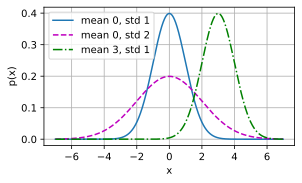

In [7]:
x = np.arange(-7, 7, 0.01)

# 均值和标准差对
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x', ylabel='p(x)', \
         figsize=(4.5, 2.5), legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

如图，增加均值会产生右移，增加方差会使分布分散、峰值降低。

均方损失可用于线性回归的一个原因是：我们假设观测中包含服从正态分布的噪声，则：

$$ y = \boldsymbol{w}^T \boldsymbol{x} + b + \epsilon $$

其中$ \epsilon \sim N(0, \sigma^2) $

因此，对于给定的$ \boldsymbol{x} $，观测到特定$ y $的似然（likelihood）函数为：

$$ P(y|\boldsymbol{x}) = \frac{1}{\sqrt{2 \pi \sigma^{2}}} exp \left [-\frac{1}{2 \sigma^{2}}(y - \boldsymbol{w}^T \boldsymbol{x} - b)^{2} \right ]$$

对于整个数据集，似然函数为：

$$ P(\boldsymbol{y}|\boldsymbol{X}) = \prod_{i = 1}^{n} p(y^{(i)}|\boldsymbol{x}^{(i)}) $$

根据极大似然估计法，参数$ \boldsymbol{w} $和$ b $的最优估计量是使整个数据集的似然函数最大的值，称为极大似然估计量。

由于最大化许多指数函数的乘积较为困难，在不改变目标的前提下，可以通过最大化似然对数来简化。由于历史原因，优化通常指最小化而不是最大化，因此可以改为最小化复对数似然函数：

$$ -logP(y|\boldsymbol{x}) = \sum_{i = 1}^{n} \frac{1}{2} log(2 \pi \sigma^{2}) + \frac{1}{2 \sigma^{2}} (y^{(i)} - \boldsymbol{w}^T \boldsymbol{x}^{(i)} - b)^{2}$$

通常假设$ \sigma $为常数，则可以看出，在高斯噪声的假设下，最小化均方误差等价于对线性模型的极大似然估计。